In [ ]:
# Run this cell if you don't have the following libraries installed
!pip3 install xlrd
!pip3 install openpyxl

!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install scipy 
!pip3 install imbalanced-learn
!pip3 install statsmodels

In [1772]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

***

<div style="background: linear-gradient(to right, #3c3c3c, #6e6e6e); color:white; padding:10px; border-radius:10px; font-size:24px; text-align:center;">
    Assignment #1 - Data Preparation
</div>


# <font color='#3c3c3c'>Task 1</font>

In [1773]:
"""When I did this task I ran into some issues dowloading the dataset. 
After a few minutes I realized that the newest version of xlrd was no 
longer compatible with .xls files so I decided to change the format of 
the file to .xlsx to load it. I decided to do since I was struggling to 
download an old version of xlrd. """

df = pd.read_excel("titanic.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


It is important to understand the structure of the data before modifying or transforming the data. By performing exploratory data analysis (EDA), we can detect missing values, identify outliers, understand feature distributions, and recognize potential relationships between variables. Visualizations provide further insights by making it easier to understand the data. 

### <font color='6e6e6e'>Exploratory Statistics</font>

First, I will use describe() (it was very commmon in our other courses), so I decided to give it a try to get a few details of the dataframe (count, mean, min/max, etc)

In [1774]:
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  



The results weren't the most helpful; it didn't even show all the columns in the dataset. It did let us know that there are 1309 entries and a few intresting insights, but nothing extremely helpful. Now let's try a different function, info(). 

In [1775]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


This method was more helpful since it helped me with a bit more information about the dataset. Again, it showed us that there are 1309 entries, which is a manageable amount of data to practice ML. We also know that there are 14 columns per entry of which 7 are categorical (which we will have to encode later on) and 7 are numerical. It also provides information about the null values present in each column. Since we have 1309 entires then pclass, survived, name, sex, sibsp, parch, and ticket columns are the only ones that have no missing values. We will just keep this in mind for now and address this in the next task.

Addtionally, it is always important to check for duplicates in the dataset to avoid bias. If there multiple entries with the same information it could skew the data, adding bias not only to the analysis but to the model (it could learn patterns)

In [1776]:
df.duplicated().sum()

np.int64(0)

Luckily, the data has no duplicates. 

We can also try and see if there are any correlated features in the dataset, but I believe we can only do this for the numerical columns (or at least I only know how to do it with the numerical ones)

In [1777]:
correlations = df.corr(numeric_only=True)
print(correlations)

            pclass  survived       age     sibsp     parch      fare      body
pclass    1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558629 -0.034642
survived -0.312469  1.000000 -0.055513 -0.027825  0.082660  0.244265       NaN
age      -0.408106 -0.055513  1.000000 -0.243699 -0.150917  0.178739  0.058809
sibsp     0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160238 -0.099961
parch     0.018322  0.082660 -0.150917  0.373587  1.000000  0.221539  0.051099
fare     -0.558629  0.244265  0.178739  0.160238  0.221539  1.000000 -0.043110
body     -0.034642       NaN  0.058809 -0.099961  0.051099 -0.043110  1.000000


From the results, we can see that most correlations are weak, with values mostly below 0.60. There are a few negative correlations, but none appear particularly strong. Since interpreting numerical correlation values directly can be challenging, a heatmap would typically help identify patterns more easily. However, based on the numerical results alone, it is already evident that there are no strong correlations. I'll further analyze this after encoding since there can be new possible correlations then.

### <font color='6e6e6e'>Numerical Features Visualizations</font>

I will start by visualizing the distributions of the numerical features. I believe this will guide me to make further visualizations. 

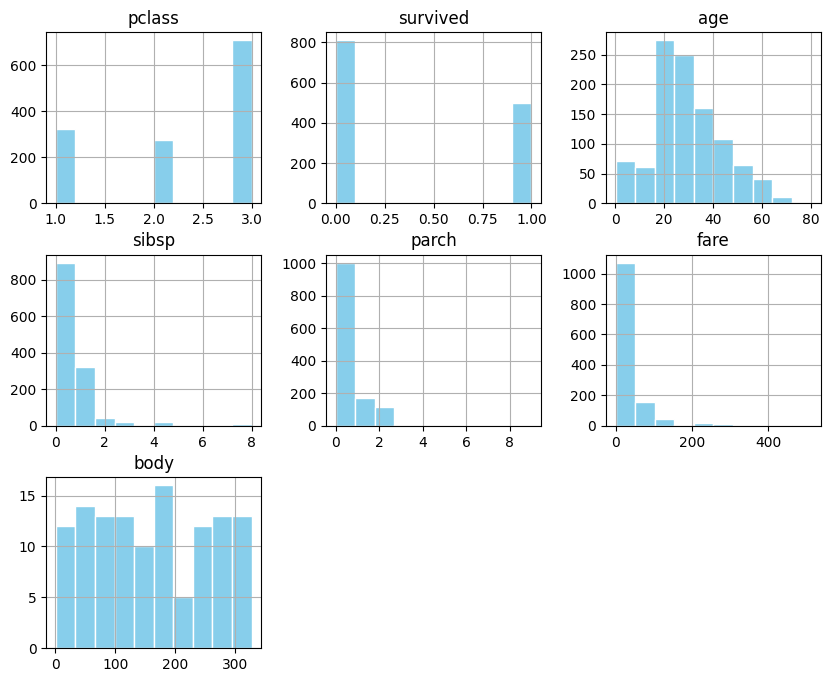

In [1778]:
df.hist(figsize=(10, 8), color='skyblue', edgecolor='white')
plt.show()

These histograms provide a quick insight into each of the columns.



The **pclass** column graph makes it clear that there much more people from the third class than the first and second classes in the dataset. There are between 550 passengers that belong to the first and second class, while around 800 belong to the third class. 

The **survived** column graph tells us that there are about 800 people that didn't survive, which is much more than those approximately 500 that did. 

As we previously saw with describe(), passengers' mean age was around 29-30. The **age** column graph shows us that most passengers were around 20 years old, while around 70 passengers were 0-10 years old, and very few passengers were more that 60 years old. This means that there were more young adults and kids than there were old adults (right skewed). 

The **sibsp** and **parch** columns show that majority of the passengers had less than 2 companions on-board. Some had one companion (probably spouses or kids), and very few had families on-board (few outliers). 

The **fares** column shos that majority of passengers paid low fares, which we already knew since majority of passengers were traveling in third class. Still, there are a few passengers who paid more that 200 and a few outliers who paid more that 500. 

Finally, the last graph on the **body** column is not relevant since this is the column that just tells us the number of the found bodies. 

These histograms provided useful information about skewness and outliers, which we will have to deal with in later tasks. Nevertheless, the histograms provided information on individual variables. Now I want to get information on relationships, specifically the survival rates across the different numerical columns. I will use barplots for easy analysis and print the number of passengers per category. This way, I will know if the relationship is biased. 

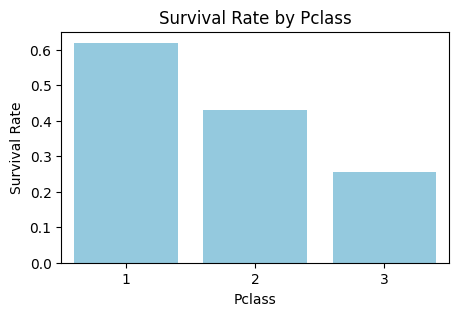

In [1779]:
plt.figure(figsize =(5,3))
sns.barplot(x="pclass", y="survived", data=df, errorbar=None, color='skyblue') 
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Pclass")
plt.show()

In [1780]:
# I will create a copy to avoid modifying the original dataset since I am just exploring for now
df_copy = df.copy()

pclass_counts = df_copy.groupby('pclass')['survived'].agg(['count', 'mean'])
print(pclass_counts)

        count      mean
pclass                 
1         323  0.619195
2         277  0.429603
3         709  0.255289


**Surival Rate vs Pclass**

The graph shows a clear **linear relationship**. As expected, the survival rate for passengers in the first class is much higher than that in the third class. The barplot clearly shows this trend: the higher the class, the higher the survival rate. While the survival rate in the first class is about 60%, it drops to less than 30% in the second class. This is interesting, given that the third class made up a larger proportion of the passengers. Therefore, it’s intuitive that fewer third-class passengers survived and probably make most of the dead passengers. We can confirm this by printing the quantity of passengers in each class. Only 277 passengers belonged to second class, while 709 passengers belonged to the third class. 

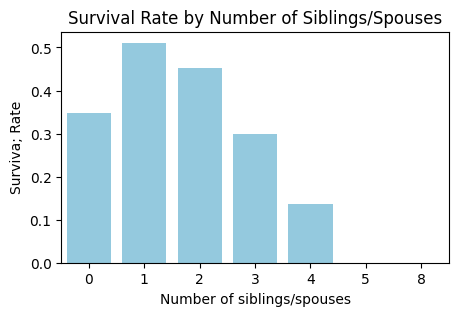

In [1781]:
plt.figure(figsize =(5,3))
sns.barplot(x="sibsp", y="survived", data=df, errorbar=None, color='skyblue')
plt.xlabel("Number of siblings/spouses")
plt.ylabel("Surviva; Rate")
plt.title("Survival Rate by Number of Siblings/Spouses")
plt.show()

In [1782]:
sibsp_counts = df_copy.groupby('sibsp')['survived'].agg(['count', 'mean'])
print(sibsp_counts)

       count      mean
sibsp                 
0        891  0.346801
1        319  0.510972
2         42  0.452381
3         20  0.300000
4         22  0.136364
5          6  0.000000
8          9  0.000000


**Survival Rate vs Number of siblings/spouses**

Additionally, I visualized survival rates by the number of siblings/spouses on board. The results showed that passengers traveling alone had a lower survival rate compared to those with one companion, while those with more than one companion had a decreased survival rate. This is an intresting insight. I would have guessed that this relationship was linear and that being alone would increase your chances of survival that having one other companion.

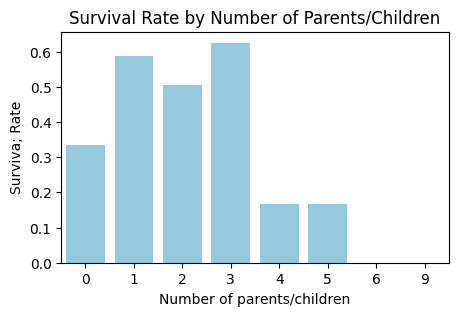

In [1783]:
plt.figure(figsize =(5,3))
sns.barplot(x="parch", y="survived", data=df, errorbar=None, color='skyblue')
plt.xlabel("Number of parents/children")
plt.ylabel("Surviva; Rate")
plt.title("Survival Rate by Number of Parents/Children")
plt.show()

In [1784]:
parch_counts = df_copy.groupby('parch')['survived'].agg(['count', 'mean'])
print(parch_counts)

       count      mean
parch                 
0       1002  0.335329
1        170  0.588235
2        113  0.504425
3          8  0.625000
4          6  0.166667
5          6  0.166667
6          2  0.000000
9          2  0.000000


**Survival Rate vs Number of parents/children**

This pattern also holds for the relationship with the number of parents/children. Most passengers had between 0 and 2 parents/children on board. Although the graph shows that the survival rate slightly increased for those with 3 parents/children, we must note that this applied to only 8 passengers. This reinforces the conclusion that having one companion increased the chances of survival compared to being alone, but having more than one companion appeared to decrease survival chances.

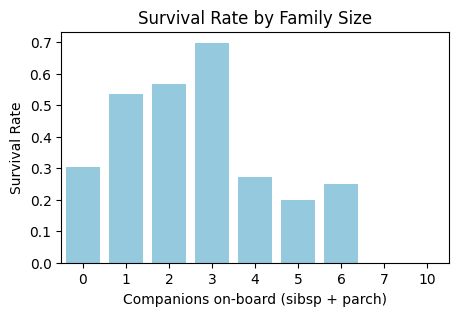

In [1785]:
df_parch_sibsp = df.copy() # I created a copy to not mess with the original dataset 

df_parch_sibsp['companions'] = df_parch_sibsp['sibsp'] + df_parch_sibsp['parch']

plt.figure(figsize=(5,3))
sns.barplot(x='companions', y='survived', data=df_parch_sibsp, errorbar=None, color="skyblue")
plt.xlabel('Companions on-board (sibsp + parch)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()


In [1786]:
parch_counts = df_parch_sibsp.groupby('companions')['survived'].agg(['count', 'mean'])
print(parch_counts)

            count      mean
companions                 
0             790  0.302532
1             235  0.536170
2             159  0.566038
3              43  0.697674
4              22  0.272727
5              25  0.200000
6              16  0.250000
7               8  0.000000
10             11  0.000000


**Survival Rate vs Companions on-board**

I just wanted to see how the graph would change if I combined both sibsp and parch since both columns represent passengers' companions. The graph is not consistent with the previous results. While it shows that passengers are not better off being alone, the graph shows that passengers have a better chance of surviving if they have 3 companions rather than 1. It is important to note that there are significantly less passengeres with 3 companions than with 1 or 2. The small sample size for those with 3 companions could be skewing the result. 
Furthermore, the graph clearly indicates that as the number of companions increases beyond 2 or 3, the chances of survival tend to decrease, supporting the idea that larger groups might have faced more challenges or were less likely to survive.

I want to further analyze the relationships with the other relevant columns so we have to find a way to group the data and graph it. We will graph the relationships between survival rate and **age** and **fare** since the relationship with found bodies is not relevant.

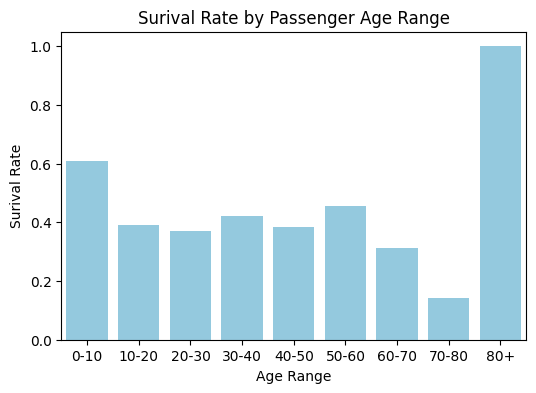

In [1787]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, df['age'].max() + 1]
age_ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

df_copy['age_group'] = pd.cut(df_copy['age'], bins=age_bins, labels=age_ranges, right=False)

age_survival_rate = df_copy.groupby('age_group', observed=False)['survived'].mean()

plt.figure(figsize =(6,4))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values, color='skyblue')

plt.title("Surival Rate by Passenger Age Range")
plt.xlabel("Age Range")
plt.ylabel("Surival Rate")

plt.show()


It seems odd that kids have such a high survival rate and that elderly have a 100% of survival rate, so I want to check how many passengers fall in each age group. This helps to clarify things because, for example, if there were only 5 people in the 80+ age group, and all 5 happened to survive, then of course that the survival rate would be 100%.

In [1788]:
age_group_counts = df_copy.groupby('age_group', observed=False)['survived'].agg(['count', 'mean'])
print(age_group_counts)

           count      mean
age_group                 
0-10          82  0.609756
10-20        143  0.391608
20-30        344  0.369186
30-40        232  0.422414
40-50        135  0.385185
50-60         70  0.457143
60-70         32  0.312500
70-80          7  0.142857
80+            1  1.000000


**Surival Rate vs Age Range**

The results make the graph much more clear. I made an assumption earlier that kids had a lower change of survival but even though the sample is still small, 82, it make sense that babies/kids had a higher survival rate since their safety was probably prioritized. Additionally, we should disregard the age group 80+ since there is only one sample. 


In conclusion, there seems to be a relationship between age and survival rate, yet, it is a **non-linear relationship**. Kids/babies had a higher chance of survival, elderly had a lower chance of survival, while middle-aged passengers had a survival rate from ~37% to ~ 46%. Since the sample sizes in some age groups are small, we should be cautious about drawing strict conclusions.

Now moving on with graphing the relationship between survival rate and fares. Hopefully there is a relationship similar to the one we got with passenger classes since fare prices determine the class. We will also print the number of passengers in each fare range to be able to anaylze accordingly.

In [1789]:
# First I need to find min and max fares to know how to split the bins

min_fare = df['fare'].min()
max_fare = df['fare'].max()

print("Min Fare:", min_fare)
print("Max Fare:", max_fare)

Min Fare: 0.0
Max Fare: 512.3292


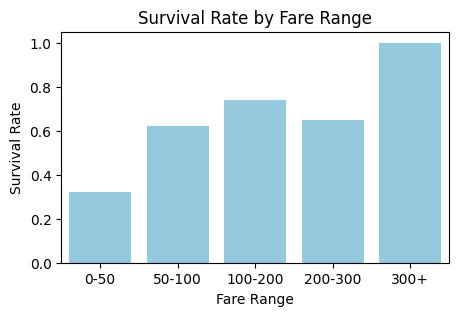

In [1790]:
# Now that we know the min and max we can split the bins accordingly

fare_bins = [0, 50, 100, 200, 300, 512.33]
fare_ranges = ['0-50', '50-100', '100-200', '200-300', '300+']


df_copy['fare_group'] = pd.cut(df_copy['fare'], bins=fare_bins, labels=fare_ranges, right=False)

fare_survival_rate = df_copy.groupby('fare_group', observed=False)['survived'].mean()


plt.figure(figsize=(5, 3))
sns.barplot(x=fare_survival_rate.index, y=fare_survival_rate.values, color='skyblue')
plt.title("Survival Rate by Fare Range")
plt.xlabel("Fare Range")
plt.ylabel("Survival Rate")

plt.show()


In [1791]:
fare_group_counts = df_copy.groupby('fare_group', observed=False)['survived'].agg(['count', 'mean'])
print(fare_group_counts)

            count      mean
fare_group                 
0-50         1066  0.320826
50-100        158  0.620253
100-200        46  0.739130
200-300        34  0.647059
300+            4  1.000000


Based on the results it seems that there is a positive relationship between fare range and survival rate (which is what we expected!). Passengers paying higher fares (and thus likely traveling in higher-class cabins) have a higher chance of survival. However, the graph does show that the fare range between 200 and 300 has a higher survival rate that the fare range between 100 and 200. Again, there are very few passengers in these ranges; sample sizes are small so we shouldn't draw strict conclusions. 

### <font color='6e6e6e'>Categorical Variables Visuzalizations</font>

Now moving on the categorical columns, we will graph the relationship between survival rate and the most relevant columns, sex and embarked .

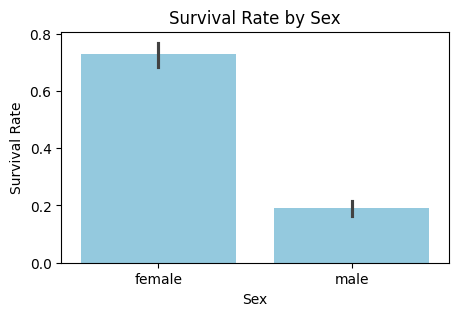

In [1792]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df['sex'], y=df['survived'], color='skyblue')

plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

**Survival Rate vs Sex**:
As expected, females have a higher chance of survival, with their survival rate being more than three times higher than that of males.

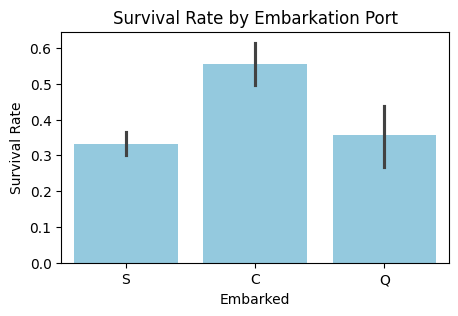

In [1793]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df['embarked'], y=df['survived'], color='skyblue')

plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked')
plt.show()

**Survival Rate vs Embarkation Port**:
Results show that passengers who embarked on port C had the highest chance of survival, ~55%, while passengers who embarked on posrt S and Q had similar survival rate, ~34% and ~36%. 

### <font color='6e6e6e'>Task 1 Summary</font>

**Numerical parameters** 

    - Survival Rate vs. **Pclass**: The higher the class (1 being the highest and 3 being the lowest), the higher the survival rate.
    - Survival Rate vs. **Age**: There is a non-linear relationship, with kids and babies having the highest survival rates.
    - Survival Rate vs. **Sibsp**: Having 1 companion increases the chances of survival compared to having no companions, but having more than one companion decreases the survival rate.
    - Survival Rate vs. **Parch**: Similar to Sibsp, having 1 companion increases the chances of survival compared to having none, but having more than one decreases the chances. The graph shows that 3 companions have the highest survival rate, but the sample size is very small.
    - Survival Rate vs. **Fare**: There is a positive relationship; the higher the fare, the higher the chances of survival.

**Categorical parameters**

    - Survival Rate vs. **Sex**: Females had almost four times the chance of survival compared to males.
    - Survival Rate vs. **Embarked**: Passengers who embarked at port C had a higher survival rate, while those who embarked at ports S and Q had similar survival rates.

### <font color='6e6e6e'>Why are the findings meaningful?</font>

The findings in task 1 are meaningful for the stage of data preparation becuase we gained insights on possible relationships and sample sizes. Knowing the possible relationships help us identify important features that we should further analyze and those that we should encode for machine learning models. Additionally, analyzing distributions and sample sizes helps us identify outliers and highlight the importance of data balancing in some areas. This will help us for decision-making later on. 

# <font color='#3c3c3c'>Task 2 and 5</font>

### <font color='6e6e6e'>Missing values</font>


When I used info() it already provided me with the number of non-null values per column, but we can further analyze this to get a clearer idea of the missing values. We will now use isnull() and sum() so we get the number of missing values instead of having to subtract the non-null values from the total number of entries per column.

In [1794]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


The isnull() function now clearly states the number of null values per column. As we already knew, there are 7 columns that have null values. The columns that have the most missing values are the cabin and, boat, and body columns. This makes sense since most passengers that were assigned cabins belonged to the first class (so missing cabin likely refer to third class passengers), only survivors had boats, and only non-survivors had bodies to be found. To further analyze what strategy to use for the missing values it will be useful to know the percentage of missing values per column.

In [1795]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage[missing_values_percentage > 0])

age          20.091673
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


Considering there are several strategies that could be applied to handle missing values and that there is no way of knowing which is the best technique until after model validation, we have to make an educated guess by anaylzing the previous data anaylysis be made of each column. 

Before doing that I want to think about whether or not we should drop or not the columns with missing values. 
- **age**: This column is relevant due to a possible relationship with survival rate as we saw before in task #1. Therfore, we should not drop this column. 

- **fare**: This column is relevant due to a possible relation but it does go hand in hand with pclass so maybe it is a bit redundant. We can keep for now.

- **cabin**: This column is relevant since the cabin probably tells us the class the passengers belonged too, but again it could be redundant. It would be more helpful if we had more information on where the cabins were located. Addtionally, 77% of the entries are missing so we can drop it.

- **embarked**: This column could give us further insights and there not even 1% of missing values so we can keep it for now.

- **boat**: This columns is not relevant since the survival column already tells us if the passenger survived, and since boats are only for those who survived it won't help us. We should drop it.

- **body**: Again, this column is not relevant. If a passenger's body is found it won't help us determine if a passenger will survive or not. We should drop it. 

- **home.dest**: There is little potential this is helpful and there's almost 50% of the data missing. I'm going to take a chance and drop it. 




In [1796]:
# I decided to create this function becuase I had trouble when I wanted to re-run the dropping cells
def drop_columns_if_exist(df, columns):
    columns_to_drop = [col for col in columns if col in df.columns]  
    if columns_to_drop:  
        df.drop(columns=columns_to_drop, inplace=True)
    return df  


df = drop_columns_if_exist(df, ['cabin', 'boat', 'body', 'home.dest'])

Now that I analyzed the columns that I can drop I can move on to data imputation (Quick Note: if the data was much larger, we could consider getting rid of the entries(rows) with missing values. But, our dataset is not only not large enough, but some of the columns are meant to have missing values, like the body and boat columns. That's why I will drop those columns but keep the rest of the entries). 

- age: The distribution across age in this dataset follows an approximate normal distibution (according to the graph in task #1). Therefore, I believe that a good data imputation technique would be using the mean or median. I prefer the median because it's more robust to outliers, ensuring that extreme values don’t skew the imputed age. 

- fare: Considering that most passengers paid low fares, making it right skewed, it will also be better to use the median. 

- embarked: Since this column is categorical, we can't use the techniques we've been looking at. Nevertheless, considering that there are few missing values, we can just use the mode to fill in. 

- home.dest: This is another categorical column, so we can also use the mode. 

### <font color='6e6e6e'>Splitting data</font>

Before applying the strategies mentioned above, it is better to first complete Task #5 (data splitting). The reason behind this decision is to prevent data leakage. If I imput missing values, like mean or median, before splitting, these values would be calculated based on the entire dataset, including data from the test and validation sets. This would provide the model with information that it would never have in the real-world during training. By splitting first, I ensure that imputation is done only on the training set; this prevents overfitting. 

Considering that the dataset is not large, I will split the data into 70% for training and 30% between validation and test data in the first split. This will help me have enough data to train the model and be able to generalize to unseen data. 

In [1797]:
from sklearn.model_selection import train_test_split # I used this library as it was recommended 

X, Y = df.drop(columns=['survived']), df['survived']

# first reccomended split
X_train, X_other, Y_train, Y_other = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

#second reccomended split 
X_val, X_test, Y_val, Y_test = train_test_split(X_other, Y_other, test_size=0.5, random_state=42, stratify=Y_other)

# now I will just check the dimensions of each split 
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (916, 9)
X_val shape: (196, 9)
X_test shape: (197, 9)


I used the recommended splitting techinque, train_test_split. I think it was a good choice since it provides a straightfoward for the process and it uses the paramater stratify that helps me mantain the original distribution throughout the sets. 

I want to make sure that the split was done correctly, so I will check that there are no duplicated rows throught the different datasets.

In [1798]:
print("Overlap between Train and Validation:", X_train.index.intersection(X_val.index).shape[0])
print("Overlap between Train and Test:", X_train.index.intersection(X_test.index).shape[0])
print("Overlap between Validation and Test:", X_val.index.intersection(X_test.index).shape[0])

Overlap between Train and Validation: 0
Overlap between Train and Test: 0
Overlap between Validation and Test: 0


We're good! Since the results was 0 for all of them then that means that there are no duplicates, no data leakage. 

Additionally, I will double check that the datasets are representative of the original distribution using stratification. 

In [1799]:
def check_class_distribution(y, df):
    distribution = Y.value_counts(normalize=True) * 100  
    print(f"\n{df} Class Distribution:\n{distribution}")

# Checking distribution in the original dataset
check_class_distribution(Y, "Original Dataset")

# check distributions in the split sets
check_class_distribution(Y_train, "Training Set")
check_class_distribution(Y_val, "Validation Set")
check_class_distribution(Y_test, "Test Set")



Original Dataset Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

Training Set Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

Validation Set Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

Test Set Class Distribution:
survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64


Luckily, the results show that the original dataset's distribution has been mantained across the training, validation, and test sets. The splitting process was done correctly!

### <font color='6e6e6e'>Data Imputation</font>

Now that that the data has been split and checked, I can continue with the rest of task #2, data imputation. I was going to manually find the values that I mentioned before to input them into the data, but SimpleImputer from sklearn.impute library apparently can quickly provide these values. So I will try it out. 

In [1800]:
from sklearn.impute import SimpleImputer

#numerical columns (qge and fare)
age_imputer = SimpleImputer(strategy='median')
fare_imputer = SimpleImputer(strategy='median')

X_train['age'] = age_imputer.fit_transform(X_train[['age']]).ravel()
X_train['fare'] = fare_imputer.fit_transform(X_train[['fare']]).ravel()

X_val['age'] = age_imputer.transform(X_val[['age']]).ravel()
X_val['fare'] = fare_imputer.transform(X_val[['fare']]).ravel()

X_test['age'] = age_imputer.transform(X_test[['age']]).ravel()
X_test['fare'] = fare_imputer.transform(X_test[['fare']]).ravel()

#  categorical column (embarked)
embarked_imputer = SimpleImputer(strategy='most_frequent')

X_train['embarked'] = embarked_imputer.fit_transform(X_train[['embarked']]).ravel()

X_val['embarked'] = embarked_imputer.transform(X_val[['embarked']]).ravel()

X_test['embarked'] = embarked_imputer.transform(X_test[['embarked']]).ravel()



In [1801]:
# Quickly checking that there are no null values

print("\nMissing values in X_train:\n", X_train.isnull().sum())
print("\nMissing values in X_val:\n", X_val.isnull().sum())
print("\nMissing values in X_test:\n", X_test.isnull().sum())


Missing values in X_train:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Missing values in X_val:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Missing values in X_test:
 pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


The data imputation process was succesful, there are no more null values in the datasets. This will help us prevent errors while trianing our model.

# <font color='#3c3c3c'>Task 3</font>

### <font color='6e6e6e'>Identifying Categorical Variables</font>

Once again, let's find the categorical columns in out dataset

In [1802]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')


### <font color='6e6e6e'>Dropping and Encoding Variables</font>

Even though there are 5 columns identified as categrical, I'm not going to encode all of them since not all columns are relevant. I will be focusing on sex, embarked, and pclass which is originally a numerical column in the dataset but represents a categorical feature in reality. Additionally, I will be dropping the name and ticket features as they are not relevant; they do not provide any useful information for predicting survival. 

In [1803]:
# function to drop columns if they exist so that they dont ouput error if ran twice
def drop_columns_if_exist(df, columns):
    columns_to_drop = [col for col in columns if col in df.columns]  
    if columns_to_drop:  
        return df.drop(columns=columns_to_drop)
    return df 


X_train = drop_columns_if_exist(X_train, ['name', 'ticket'])
X_val = drop_columns_if_exist(X_val, ['name', 'ticket'])
X_test = drop_columns_if_exist(X_test, ['name', 'ticket'])

At first, I encoded all three categorical features using one-hot encoding, but after knowing that we weren't limited to just one method I decided to use other strategies. After careful analysis, I have decided to use three different encoding methods according to the type of the categorical features. 

    - Since the "sex" column has two different categories, label encoding is a good option. Nevertheless, I will use one-hot encoding so that I can separately see the correlations between both categories with other features seprately.
    - The "embarked" column has three categories and no specifc order between them. So, I will do one-hot encoding for it. This will transofrm the "embarked" feature intro three separate binary features. 
    - The "pclass" feature has three categories with a relevant hierarchical order. So, it wouldn't be a great idea to use one-hot encoding, instead, I will use ordinal encoding. This willl keep the order of the categories. 

In [1804]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# manually selected columns
categorical_cols = ['sex', 'embarked', 'pclass']

# copies to be safe and easy modification later on
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()
X_test_encoded = X_test.copy()

# 2 different encoding methods
# 'ignore' will help us with categories not seen in training set
one_hot_encoder = OneHotEncoder(drop=None, handle_unknown='ignore', sparse_output=False)  
ordinal_encoder = OrdinalEncoder(categories=[[1, 2, 3]])  


In [1805]:
### SEX ENCODING WITH ONE-HOT ENCOCDING ###

# Training set
sex_train = one_hot_encoder.fit_transform(X_train_encoded[['sex']])
sex_train_df = pd.DataFrame(sex_train, columns=one_hot_encoder.get_feature_names_out(['sex']))
X_train_encoded = X_train_encoded.drop(columns=['sex']).reset_index(drop=True)
X_train_encoded = pd.concat([X_train_encoded, sex_train_df], axis=1)

# Validation set
sex_val = one_hot_encoder.transform(X_val_encoded[['sex']])
sex_val_df = pd.DataFrame(sex_val, columns=one_hot_encoder.get_feature_names_out(['sex']))
X_val_encoded = X_val_encoded.drop(columns=['sex']).reset_index(drop=True)
X_val_encoded = pd.concat([X_val_encoded, sex_val_df], axis=1)

# Test set
sex_test = one_hot_encoder.transform(X_test_encoded[['sex']])
sex_test_df = pd.DataFrame(sex_test, columns=one_hot_encoder.get_feature_names_out(['sex']))
X_test_encoded = X_test_encoded.drop(columns=['sex']).reset_index(drop=True)
X_test_encoded = pd.concat([X_test_encoded, sex_test_df], axis=1)

In [1806]:
### EMBARKED ENCODING WITH ONE-HOT ENCODING ###

# training set
embarked_train = one_hot_encoder.fit_transform(X_train_encoded[['embarked']])
embarked_train_df = pd.DataFrame(embarked_train, columns=one_hot_encoder.get_feature_names_out(['embarked']))
X_train_encoded = X_train_encoded.drop(columns=['embarked']).reset_index(drop=True)
X_train_encoded = pd.concat([X_train_encoded, embarked_train_df], axis=1)

# validation set
embarked_val = one_hot_encoder.transform(X_val_encoded[['embarked']])
embarked_val_df = pd.DataFrame(embarked_val, columns=one_hot_encoder.get_feature_names_out(['embarked']))
X_val_encoded = X_val_encoded.drop(columns=['embarked']).reset_index(drop=True)
X_val_encoded = pd.concat([X_val_encoded, embarked_val_df], axis=1)

# test set
embarked_test = one_hot_encoder.transform(X_test_encoded[['embarked']])
embarked_test_df = pd.DataFrame(embarked_test, columns=one_hot_encoder.get_feature_names_out(['embarked']))
X_test_encoded = X_test_encoded.drop(columns=['embarked']).reset_index(drop=True)
X_test_encoded = pd.concat([X_test_encoded, embarked_test_df], axis=1)

In [1807]:
### PCLASS ENCODING WITH ORDINAL ENCODING ###

X_train_encoded['pclass'] = ordinal_encoder.fit_transform(X_train_encoded[['pclass']]) # training set
X_val_encoded['pclass'] = ordinal_encoder.transform(X_val_encoded[['pclass']]) # validation set
X_test_encoded['pclass'] = ordinal_encoder.transform(X_test_encoded[['pclass']]) # test set 

**Quick Note**: During the encoding process I ran into some issues. I was getting a ValueError when transforming the validation and test sets because the encoder was encountering categories in those sets that it had never seen during training. The error said something between the lines that there were NaN values (I freaked out becuase I tripled checked during the data imputation process). So, I checked again for NaN values in the sets, and none of them had null values. Naturally, I had to ask ChatGPT what was going on. It turns out that the issue wasn't with the NaN values themselves, but rather that the encoder had encountered unseen categories, like NaN, during the transformation process. ChatGPT suggested I use the handle_unknown='ignore' parameter, which tells the encoder to ignore any unseen categories and handle them without causing errors. After applying this, I was able to successfully transform the validation and test sets without further issues. 

### <font color='6e6e6e'>Encoding Effect</font>

Now let's take a look at the effect the encoding had.

In [1808]:
# As a reminder, this is how the categorical features used to look
print(X_train[categorical_cols].sample(5, random_state=2025))  


         sex embarked  pclass
442     male        S       2
1041    male        S       3
621   female        S       3
1108    male        S       3
663     male        S       3


In [1809]:
# Now, this is how they look after the encoding process
print(X_train_encoded.head(5))

   pclass   age  sibsp  parch     fare  sex_female  sex_male  embarked_C  \
0     0.0  54.0      0      1  77.2875         0.0       1.0         0.0   
1     2.0  28.0      1      0  14.4542         0.0       1.0         1.0   
2     2.0  13.0      4      2  31.3875         0.0       1.0         0.0   
3     2.0  28.5      0      0  16.1000         0.0       1.0         0.0   
4     2.0  55.5      0      0   8.0500         0.0       1.0         0.0   

   embarked_Q  embarked_S  
0         0.0         1.0  
1         0.0         0.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  


### <font color='6e6e6e'>Results</font>

Machine learning algorithms are unable to interpret categorical features directly, which is why encoding is vital. As we can see above, there were features that had string values and numeric values that represented categories: 

    - "sex" had two categories: "female" and "male" 
    - "embarked" had three categories: "C", "Q", and "S"
    - "pclass" had three categoires: 1, 2, 3

As previously mentioned, I use three different strategies to encode these categorical features. I used label encoding for "sex", one-hot encoding for "embarked", and ordinal encoding for "pclass": 

    - ""sex" is now represented by two separate columns: "sex_female" and "sex_male".
    - "embarked" is now represented by three separate columns: "embarked_C", "embarked_Q", and "embarked_S".
    - "pclass" is now encoded as 0 for first class, 1 for second class, and 2 for third class.

With this encoding process, the machine learning algorithms can now properly interpret categorical features while maintaining important distinctions between categories.

**Why these strategies?**

As mentioned before, I originally encoded all categorical features using one-hot encoding. While this approach worked, I now realize that applying different encoding strategies is more beneficial. Using one-hot encoding for all categorical features wasn't the best option, it increased the dataset size, and it even caused loss of information. By encoding "pclass" with a different method in a single column, I preserved the original information while improving efficiency.

One-hot encoding remains the best choice for "embarked" and "sex" since it they have no inherent order, and this method effectively differentiates between their different categories. I considered label encoding for "sex" becuase it has two categories ("female" and "male") and they could easily be represented in a binary way. However, as I mentioned, I decided to keep one-hot encoding to see further correlations. Similarly, ordinal encoding for "pclass" was a better choice because it preserved the natural ranking of passenger classes, where first class is better than third class, which was lost when using one-hot encoding.

It’s also possible to leave "pclass" as a numeric feature without encoding, but I preferred encoding it to ensure clarity. Besides, since it doesn't negatively affect the model it is good practice to play around with different methods.

# <font color='#3c3c3c'>Task 4</font>

Now, let's move on to feature scaling. This is an important step in data preprocessing becuase it help us scale the features so that they have the same or similar scales. Machine learning can perform poorly if the features since featurse with a larger scale wil disproportionally influence predictions. By standardizing or normalizing the features, we ensure that all input features contribute equally to the model's learning process.

First, let's find the numerical columns.

In [1832]:
numerical_cols_list = X_train.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols_list)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


We can't forget that we decided to treat pclass as a categorical variable, so we're going to define the numerical columns without pclass.

In [1811]:
numerical_cols = ['age', 'sibsp', 'parch', 'fare']

**Quick Note**: At this point, I realized that maybe it would be a good idea to combine sibsp and parch into a single column. This would make sense becuase they both represent having companions on board which, as we saw in task 1, do have a correlation with survival rate. Neverthless, I will leave the columns for now and decide on it when I can train the model and measure performance. I prefer looking into them as separate columns for now as they may have different correlations with other features.

### <font color='6e6e6e'>Standardization</font>

In [1812]:
from sklearn.preprocessing import StandardScaler  # recommended library

scaler = StandardScaler()

# training set
X_train_standardized = X_train_encoded.copy()
X_train_standardized[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# results
print("Standardized training set (numerical columns):")
print(X_train_standardized[numerical_cols].head())

# validation set
X_val_standardized = X_val_encoded.copy()
X_val_standardized[numerical_cols] = scaler.transform(X_val[numerical_cols])
#results 
print("\nStandardized validation set (numerical columns):")
print(X_val_standardized[numerical_cols].head())

# test set
X_test_standardized = X_test_encoded.copy()
X_test_standardized[numerical_cols] = scaler.transform(X_test[numerical_cols])
# resulsts
print("\nStandardized test set (numerical columns):")
print(X_test_standardized[numerical_cols].head())


Standardized training set (numerical columns):
        age     sibsp     parch      fare
0  1.917440 -0.487688  0.691284  0.905927
1 -0.112638  0.525287 -0.441482 -0.366777
2 -1.283836  3.564212  1.824050 -0.023788
3 -0.073598 -0.487688 -0.441482 -0.333441
4  2.034560 -0.487688 -0.441482 -0.496495

Standardized validation set (numerical columns):
        age     sibsp     parch      fare
0 -0.346877  0.525287 -0.441482 -0.502065
1 -0.815357 -0.487688 -0.441482 -0.504597
2 -0.034558 -0.487688 -0.441482 -0.467125
3 -0.112638 -0.487688 -0.441482  0.353212
4 -0.346877 -0.487688 -0.441482 -0.659550

Standardized test set (numerical columns):
        age     sibsp     parch      fare
0 -0.424957  0.525287  1.824050  0.657041
1 -0.346877  0.525287 -0.441482 -0.502065
2  1.214721 -0.487688  1.824050 -0.051893
3  0.590082  1.538262 -0.441482 -0.499027
4 -0.581117 -0.487688 -0.441482 -0.513121


### <font color='6e6e6e'>Normalization</font>

The slides provided by the professor mentioned that it can be beneficial to apply winsorization to handle outliers so it could be good practice to use it before normalizing the datasets.

In [1813]:
# This will help us see if there are any changes after winsorization
print("Original numerical columns (before Winsorization):")
print(X_train[numerical_cols].head())

Original numerical columns (before Winsorization):
       age  sibsp  parch     fare
306   54.0      0      1  77.2875
927   28.0      1      0  14.4542
642   13.0      4      2  31.3875
1294  28.5      0      0  16.1000
1015  55.5      0      0   8.0500


In [1814]:
from scipy.stats.mstats import winsorize

def apply_winsorization(df, columns, limits=[0.05, 0.05]):
    for column in columns:
        df[column] = winsorize(df[column], limits=limits)
    return df


X_train_winsorized = apply_winsorization(X_train_encoded.copy(), numerical_cols)
X_val_winsorized = apply_winsorization(X_val_encoded.copy(), numerical_cols)
X_test_winsorized = apply_winsorization(X_test_encoded.copy(), numerical_cols)

# results 
print("\nNumerical columns after Winsorization:")
print(X_train_winsorized[numerical_cols].head())


Numerical columns after Winsorization:
    age  sibsp  parch     fare
0  54.0      0      1  77.2875
1  28.0      1      0  14.4542
2  13.0      2      2  31.3875
3  28.5      0      0  16.1000
4  54.0      0      0   8.0500


We can see very slight changes with the results. Nevertheless, it makes sense since there weren't any crazy outliers in the dataset. 

We can now move on to normalizing the data. 

In [1815]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize the training set
X_train_normalized = X_train_winsorized.copy()
X_train_normalized[numerical_cols] = scaler.fit_transform(X_train_winsorized[numerical_cols])

# Normalize the validation set
X_val_normalized = X_val_winsorized.copy()
X_val_normalized[numerical_cols] = scaler.transform(X_val_winsorized[numerical_cols])

# Normalize the test set
X_test_normalized = X_test_winsorized.copy()
X_test_normalized[numerical_cols] = scaler.transform(X_test_winsorized[numerical_cols])

# Print the data after normalization
print("\nNumerical columns after normalization:")
print(X_train_normalized[numerical_cols].head())


Numerical columns after normalization:
        age  sibsp  parch      fare
0  1.000000    0.0    0.5  0.621259
1  0.434783    0.5    0.0  0.064103
2  0.108696    1.0    1.0  0.214254
3  0.445652    0.0    0.0  0.078697
4  1.000000    0.0    0.0  0.007315


### <font color='6e6e6e'>Conclusion</font>

So, we applied both standardization and normalization in different copies of the dataset.

Standardization usually works better for data that is uniformly distributed because it rescales the feature values so that the sample mean equals 0 and the sample standard deviation is 1. On the other hand, normalization often works better for normally distributed data. It basically compresses the features values (it assumes max and min are outliers) so that the range between the values is small. That's why it helps handling the effect that extreme outliers can have. Unfortunetly, data is complicated and it rarely follows a strict distribution so it is difficult to know which works best for your data until you test it. 

For now, I will go for normalization because logistic regression, the model we'll be using, often benefits from features being scaled to have a mean of 0 and a standard deviation of 1. This helps the model perform better since it facilitates the learning process of the relationship between the features and the target.

# <font color='#3c3c3c'>Task 6</font>

As we saw in previous tasks, there is a high chance that we are dealing with imbalanced data. We must handle this becuase when a class outnumbers another class, the model will lead to biased predictions and lack generalization. Methods like SMOTE nad ADASYN will help us generate synthetic samples of the minority classes to balance our data. This way, the model will not favor the majority class.

In [1816]:
from imblearn.over_sampling import SMOTE, ADASYN #recommended library
from collections import Counter

First, I will printing the current distribution of classes in the training data to better understand results afterwards since we will be able to compare them. Then, I will apply both SMOTE and ADASYN to learn the different effects.

In [1817]:
print("Before SMOTE and ADASYN:", Counter(Y_train))

Before SMOTE and ADASYN: Counter({0: 566, 1: 350})


The results show that the majority class is 0 with 566 instances and the minority class is 1 with 350 instances. 

### <font color='6e6e6e'>SMOTE</font>

In [1818]:
smote = SMOTE(random_state=42)
X_train_SMOTE, Y_train_SMOTE = smote.fit_resample(X_train_encoded, Y_train)

# results
print("After SMOTE:", Counter(Y_train_SMOTE))

After SMOTE: Counter({0: 566, 1: 566})


### <font color='6e6e6e'>ADASYN</font>

In [1819]:
adasyn = ADASYN(random_state=42)

X_train_ADASYN, Y_train_ADASYN = adasyn.fit_resample(X_train_encoded, Y_train)


print("After ADASYN:", Counter(Y_train_ADASYN))

After ADASYN: Counter({0: 566, 1: 512})


### <font color='6e6e6e'>Conclusion</font>

Results showed that SMOTE balanced the data perfectly, generating enough synthetic samples of the minority class so that both classes ended up with 566 instances each. ADASYN, on the other hand, also added synthetic samples but not as many as SMOTE. Both approaches have their pros and cons: SMOTE ensures a perfectly balanced dataset but may lead to overfitting, while ADASYN focuses on generating more complex instances and reduces the risk of overfitting but does not guarantee a perfectly balanced dataset.

I decided to use SMOTE for future tasks because, while it may lead to overfitting by generating too many synthetic samples it also ensures perfect balance. I will take the risk

# <font color='#3c3c3c'>Task 7</font>

Feature selection is a crucial step in data preprocessing, as it helps eliminate redundant or irrelevant features that may negatively impact the model's performance. By removing low-variance features and highly correlated variables, we reduce noise, improving generalization. 

This step is performed after data splitting to ensure that feature selection is based only on the training data, preventing data leakage and the model learning patterns.

In [1820]:
# let's list all variances
variances = X_train_SMOTE.var()

# I will sort it because there are serveral similar variances
sorted_variances = variances.sort_values()
print(sorted_variances)

embarked_Q       0.085755
embarked_C       0.163813
embarked_S       0.207707
sex_female       0.229560
sex_male         0.229560
parch            0.713858
pclass           0.723017
sibsp            0.841642
age            166.247024
fare          2755.435926
dtype: float64


In [1821]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.01  
filter = VarianceThreshold(threshold) #found this class that removes the features with variances that are lower that the threshold
X_train_selection = filter.fit_transform(X_train_SMOTE)



selected_features = X_train_SMOTE.columns[filter.get_support()]

# results
print("Selected Features after low variance filtering:", selected_features)


Selected Features after low variance filtering: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')


The optimal threshold for feature selection depends on our dataset and the task we’re working on. We need to be cautious when setting the threshold, as a high threshold might remove important features, while a low threshold could keep irrelevant ones. I’ve noticed that there are no features with a variance lower than the optimal threshold, but embarked_Q does have a noticeably smaller variance compared to the other features. However, I’ve decided not to remove it for now.

Next, I’ll perform Lasso regression to further analyze the features and their importance.

In [1822]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.01)  
lasso.fit(X_train_SMOTE, Y_train_SMOTE)
Y_val_pred = lasso.predict(X_val_standardized)
mse = mean_squared_error(Y_val_pred, Y_val)

print(f"Mean Squared Error: {mse}")
print("Lasso coefficients:")

print(lasso.coef_)

# resultss
selected_features = np.array(X_train_SMOTE.columns)[lasso.coef_ != 0]
print(f"Selected features: {selected_features}")


Mean Squared Error: 0.21827516253436643
Lasso coefficients:
[-1.40901231e-01 -5.82790290e-03 -6.02169487e-02 -0.00000000e+00
  2.93248152e-04  4.33330849e-01 -8.75751078e-16  4.40918789e-02
 -0.00000000e+00 -0.00000000e+00]
Selected features: ['pclass' 'age' 'sibsp' 'fare' 'sex_female' 'sex_male' 'embarked_C']


The results from low variance filtering and L1 regularization are quite different, which I find confusing. The low variance filter identified only one feature with low variance, suggesting that minimal feature removal is needed. However, L1 regularization eliminated three features, indicating that they might contribute less to the model. Since these methods assess feature importance differently, variance filtering focuses on spread while L1 selects features based on their contribution to prediction, I don’t have a clear decision yet. To make a more informed choice, I will analyze the correlation matrix heatmap and calculate VIF scores to identify multicollinearity before finalizing which features to remove

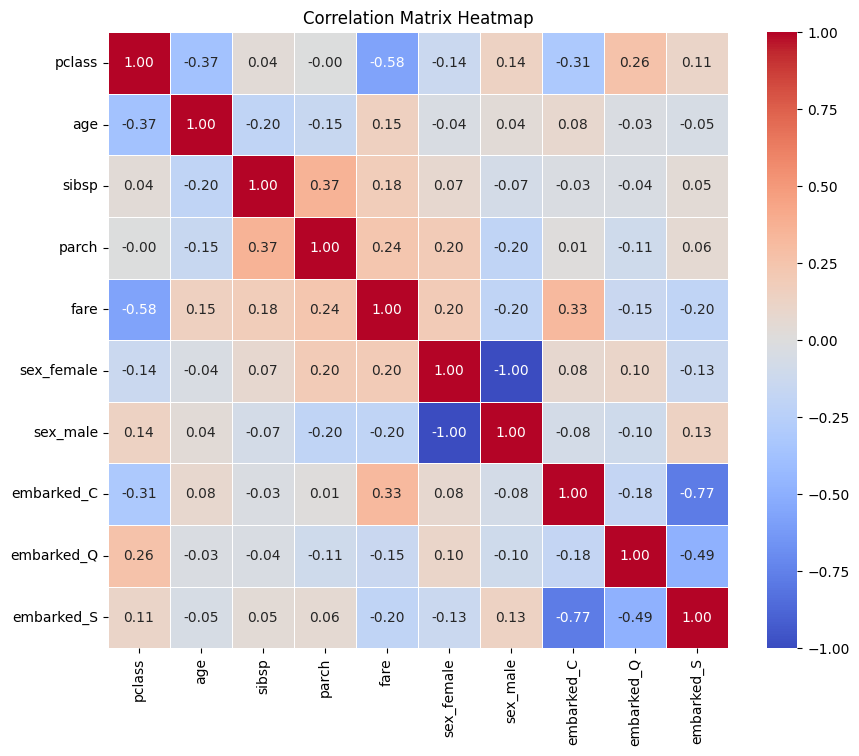

In [1823]:
correlation_matrix = X_train_SMOTE.corr()

plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

As expected, some features show high correlations, but not all of them should be removed. For instance, each feature is perfectly correlated with itself, which is expected and should be ignored.

There is only one high correalation, between sex_female and sex_male, which suggests that we can remove one of them. Based on previous analysis, I wil be removing sex_male since females are the ones who have ahigher survival rate. 

Beyond these obvious cases, I don't observe any other extremely high correlations between different features. This suggests that a moderate threshold, such as 0.6, might be a good benchmark for identifying unnecessary correlations.

Why choose this threshold? The only strong correlations I found are those that make sense. The highest correlation I observed was -0.77, so setting a threshold around 0.75 or even lowering it to 0.6 seems reasonable. However, reducing the threshold further to 0.5 could be risky, as it might lead to the removal of valuable features.

That being said, I won’t run a code-based removal process in this case because I can clearly see in the heatmap that only one feature pair exceeds the threshold: embarked_S and embarked_C. 

Neverthless, the correlation isn't crazy high, so I will perform the VIF test to see if the scores of any of these are high enough to remove them.

In [1824]:
def drop_column_if_exists(df, column_name):
    if column_name in df.columns:
        return df.drop(columns=[column_name])
    return df  # Return unchanged if column doesn't exist

# I will use SMOTE for now
X_train_selected = drop_column_if_exists(X_train_SMOTE, 'sex_male')

# I will choose to use the normalized data for now 
X_val_selected = drop_column_if_exists(X_val_standardized, 'sex_male')
X_test_selected = drop_column_if_exists(X_test_standardized, 'sex_male') 

In [1825]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_train_selected.copy()

#  VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# results
print(vif_data.sort_values(by="VIF", ascending=False))

      Feature        VIF
8  embarked_S  12.690963
6  embarked_C   4.670287
7  embarked_Q   3.300785
0      pclass   1.898082
4        fare   1.772083
3       parch   1.283136
1         age   1.231049
2       sibsp   1.217099
5  sex_female   1.111835


Considering the extremely high VIF score for embarked_S, I will remove it. 

In [1826]:
def drop_column_if_exists(df, column_name):
    if column_name in df.columns:
        return df.drop(columns=[column_name])
    return df  

X_train_selection = drop_column_if_exists(X_train_selected, 'embarked_S')

X_val_selection = drop_column_if_exists(X_val_selected, 'embarked_S')
X_test_selection = drop_column_if_exists(X_test_selected, 'embarked_S') 

I will check the VIF score one more time, to see if there is risk of any other multicollinearity risks. 

In [1827]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_vif = X_train_selection.copy()

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))

      Feature       VIF
1         age  3.105171
0      pclass  2.571679
4        fare  2.265992
5  sex_female  1.755934
3       parch  1.546175
6  embarked_C  1.481882
2       sibsp  1.465802
7  embarked_Q  1.254164


These are the final features that we will consider for our model. It was a complex process for me due to unexpected results, but I was able to gather insights to make decisions for the model. 

### <font color='6e6e6e'>Why do we carry out tasks 6-7 after splitting the dataset into training, validation, and test sets?</font>

The main reason we handle data imbalance and feature selection afteer splitting the data is becuase of data leakage. If we apply SMOTE and ADASYN before data splitting, we risk oversampling data from the validation and test sets into the training set. This will cause the model to learn from the validation and test sets already! Additionally, we want our model to have realistic predictions, but if it has access to the validation and test sets data beforehand it will have over optimistic predictions causing it to perform poorlu in real-world scnearios. 

# <font color='#3c3c3c'>Task 8</font>

Now, we can finally use a Logistic Regression model to predict passenger survial on the Titanic dataset. Logistic Regression is a commonly used algorithm for binary classification tasks, making it an ideal choice for predicting whether a passenger survives or not. 

In [1828]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_selection, Y_train_SMOTE)

Y_val_pred = logreg.predict(X_val_selection)

### <font color='6e6e6e'>Results</font>

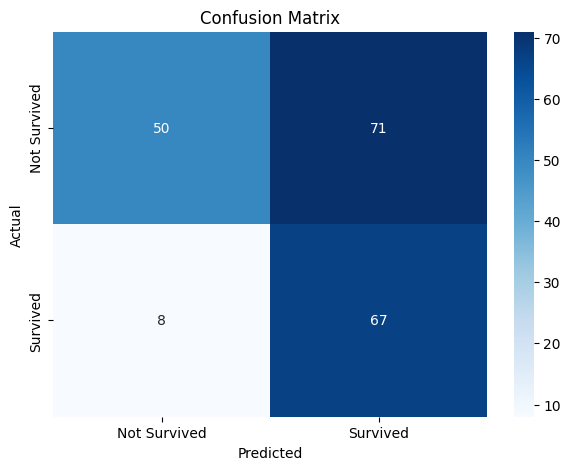


          Classification Report
              precision    recall  f1-score   support

           0       0.86      0.41      0.56       121
           1       0.49      0.89      0.63        75

    accuracy                           0.60       196
   macro avg       0.67      0.65      0.59       196
weighted avg       0.72      0.60      0.59       196



In [1829]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_val, Y_val_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Results
print("\n" + "="*50)
print("          Classification Report")
print("="*50)
print(classification_report(Y_val, Y_val_pred))
print("="*50)



The results of the Logistic Regression model show that the overall accuracy is 6%, with a precision of 86% for class 0 (non-survivors) and 41% for class 1 (survivors). The recall for class 1 is relatively high at 89%, but the recall for class 0 is much lower at 49%. This imbalance in recall suggests that the model is biased toward predicting survivors correctly while missing many non-survivors but I don't understand why since the balancing was done correctly in previous tasks. (I tried to understand why this is happening and checked several times my decisions, but I couldn't find the reason for this). This issue is likely due to a missed used variable name or something in the code that I couldn't identify. 

The results are not the best but it is a good starting point. In future steps, I will probably try a different sampling techinque and tuning hyperparamters. I am also hoping to further analyze this to understand where the imbalance is coming from.

In [1830]:
# This is just double checking that the data is indeed balanced 
import numpy as np

unique, counts = np.unique(Y_train_SMOTE, return_counts=True)
print("Class distribution after SMOTE:", dict(zip(unique, counts)))


Class distribution after SMOTE: {np.int64(0): np.int64(566), np.int64(1): np.int64(566)}
